In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('voting-survey_response.csv', index_col='RespId')
data = data.fillna(0)
data.replace('Some college', 'College', inplace=True)
data['Age_grp'] = pd.cut(data['age'], bins=[18, 39, 60, 100],
                         labels=['Young Adults', 'Middle-aged Adults', 'Senior Adults'])

data

,weight,age,Education,race,gender,income_cat,voter_category,Q1,Q2_1,Q2_2,...,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Age_grp
RespId,,,,,,,,,,,,,,,,,,,,,
470001,0.7516,73,College,White,Female,$75-125k,always,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Adults
470002,1.0267,90,College,White,Female,$125k or more,always,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Adults
470003,1.0844,53,College,White,Male,$125k or more,sporadic,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-aged Adults
470007,0.6817,58,College,Black,Female,$40-75k,sporadic,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-aged Adults
480008,0.9910,81,High school or less,White,Male,$40-75k,always,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477662,1.1916,27,College,Hispanic,Male,$40-75k,always,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Young Adults
477663,1.4623,59,High school or less,White,Female,$125k or more,rarely/never,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-aged Adults
488322,0.9252,51,College,Other/Mixed,Male,$125k or more,sporadic,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-aged Adults


### Unique values

In [3]:
def count_unique_values(column_name):
    if column_name in data.columns:
        unique_counts = data[column_name].value_counts()
        return unique_counts
    else:
        return f"Column '{column_name}' not found in the data."


column_name = 'Q29_10'
unique_counts = count_unique_values(column_name)
print(unique_counts)

Q29_10
 0.0    4494
-1.0    1141
 1.0     201
Name: count, dtype: int64


## Distribution of unique values in each column

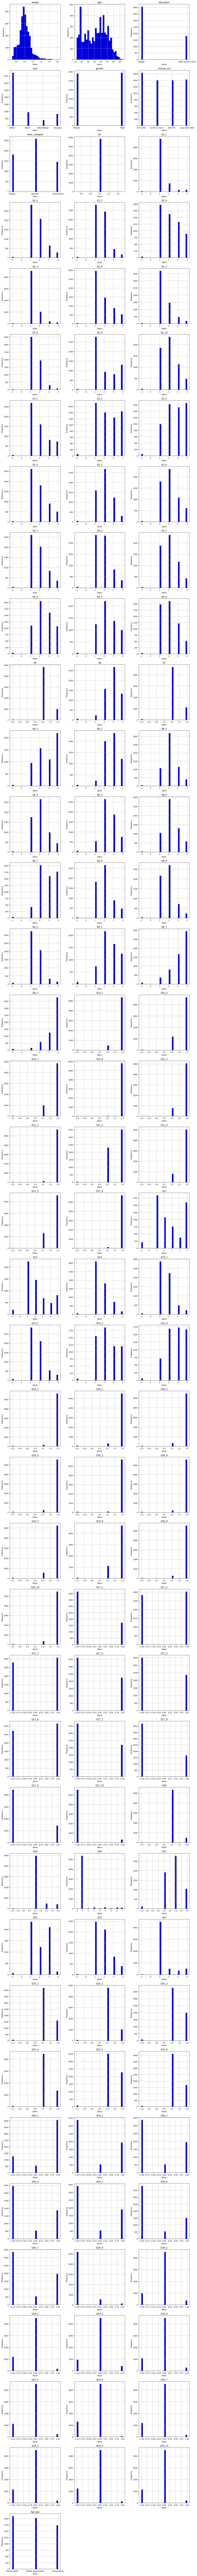

In [4]:
num_columns = len(data.columns)
cols = 3
rows = math.ceil(num_columns / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

if rows * cols > 1:
    axes = axes.flatten()

for i, column in enumerate(data.columns):
    axes[i].hist(data[column], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

if rows * cols > num_columns:
    for j in range(num_columns, rows * cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Different Categories

1. Community Engagement and Participation
   - Questions 2, 17, 18, 19, 20, 21, 24

2. Union Elections and Voting turnout
   - Questions 5, 14, 15, 22, 23, 25, 26, 29

3. Company Structure and Governance
   - Questions 3, 4, 6, 7, 8, 9, 12, 13

4. Personal Experiences and Challenges
   - Questions 10, 11, 16

## Union Elections and Voting (Category 2)

<Axes: >

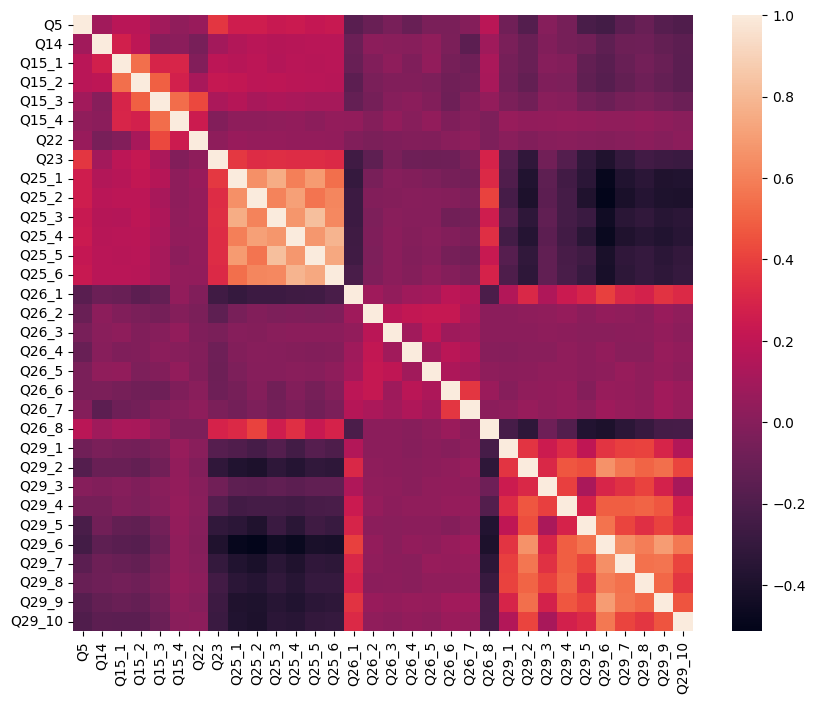

In [5]:
cat_2 = data[['Q5', 'Q14', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q22', 'Q23', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4',
              'Q25_5', 'Q25_6', 'Q26_1', 'Q26_2', 'Q26_3', 'Q26_4', 'Q26_5', 'Q26_6', 'Q26_7', 'Q26_8', 'Q29_1', 'Q29_2',
              'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'Q29_10']]

ax, fig = plt.subplots(figsize=(10, 8))
sns.heatmap(cat_2.corr())

## Category-1 EDA

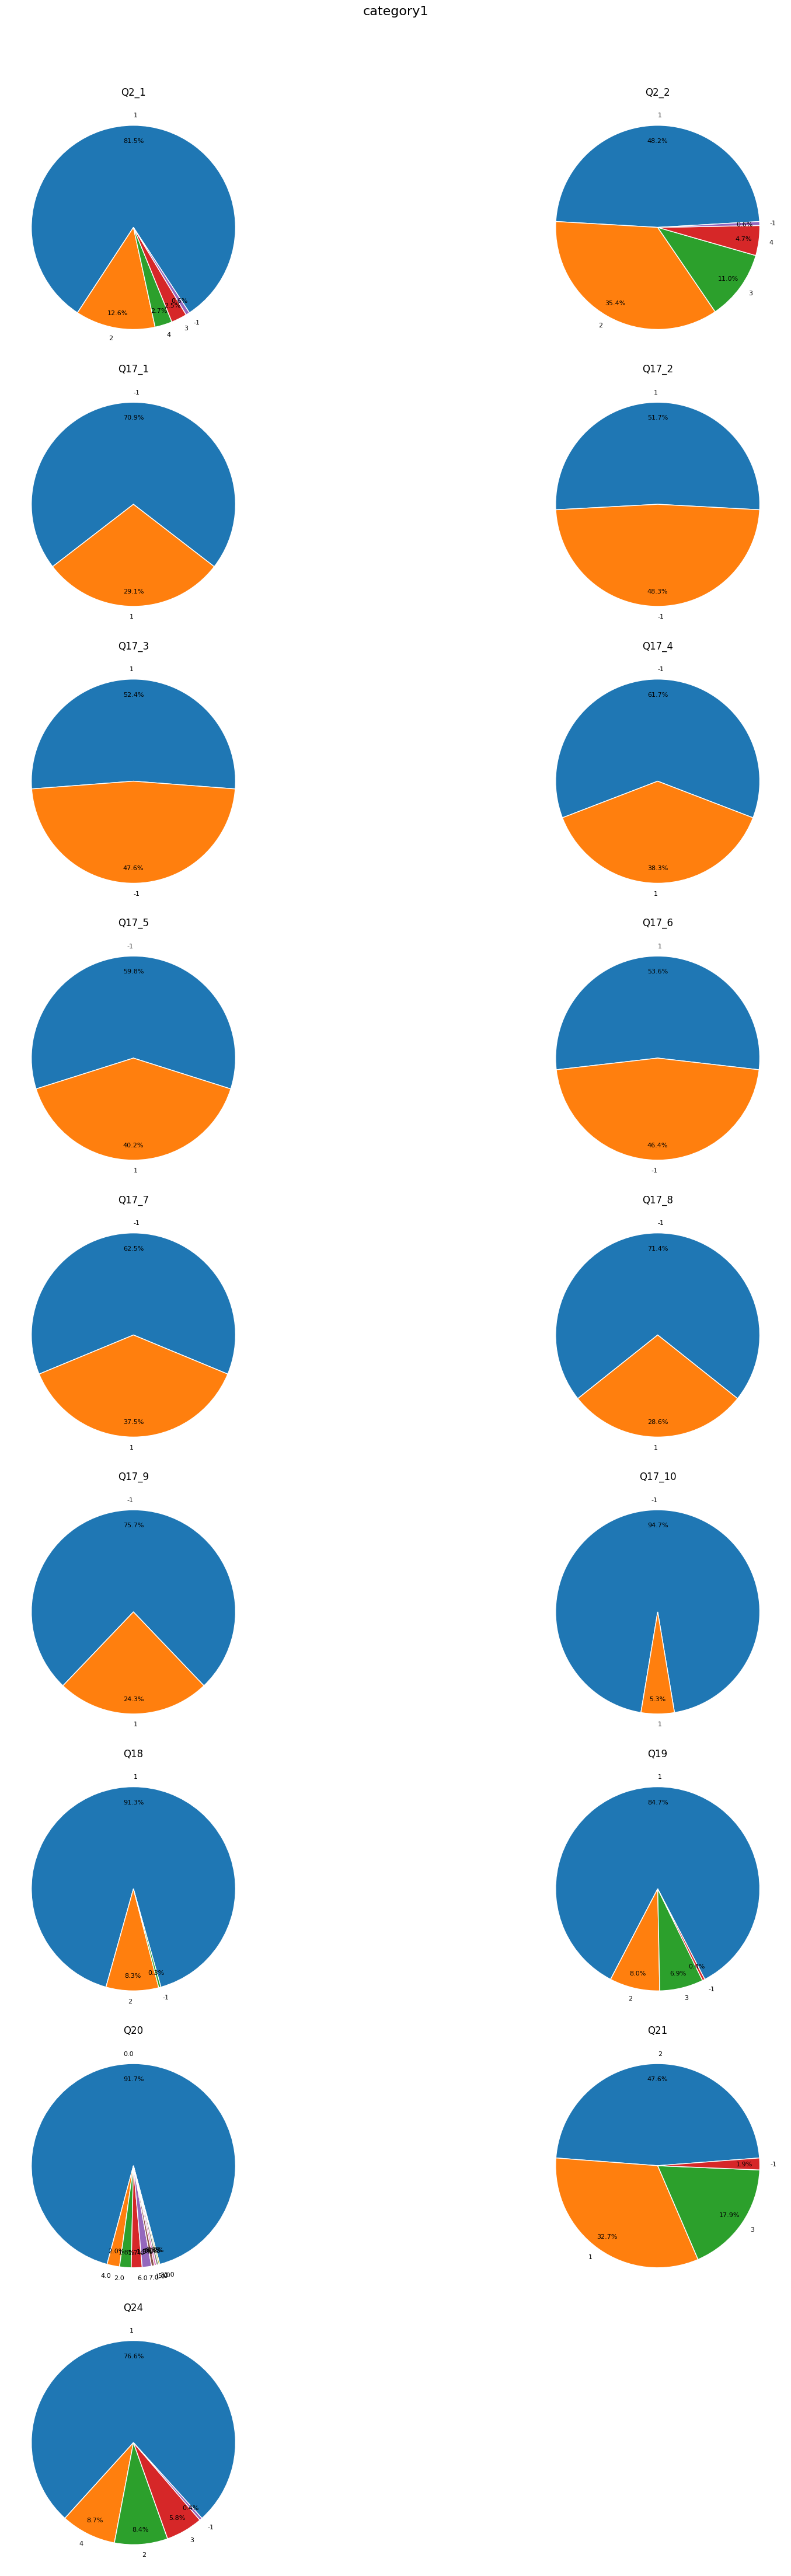

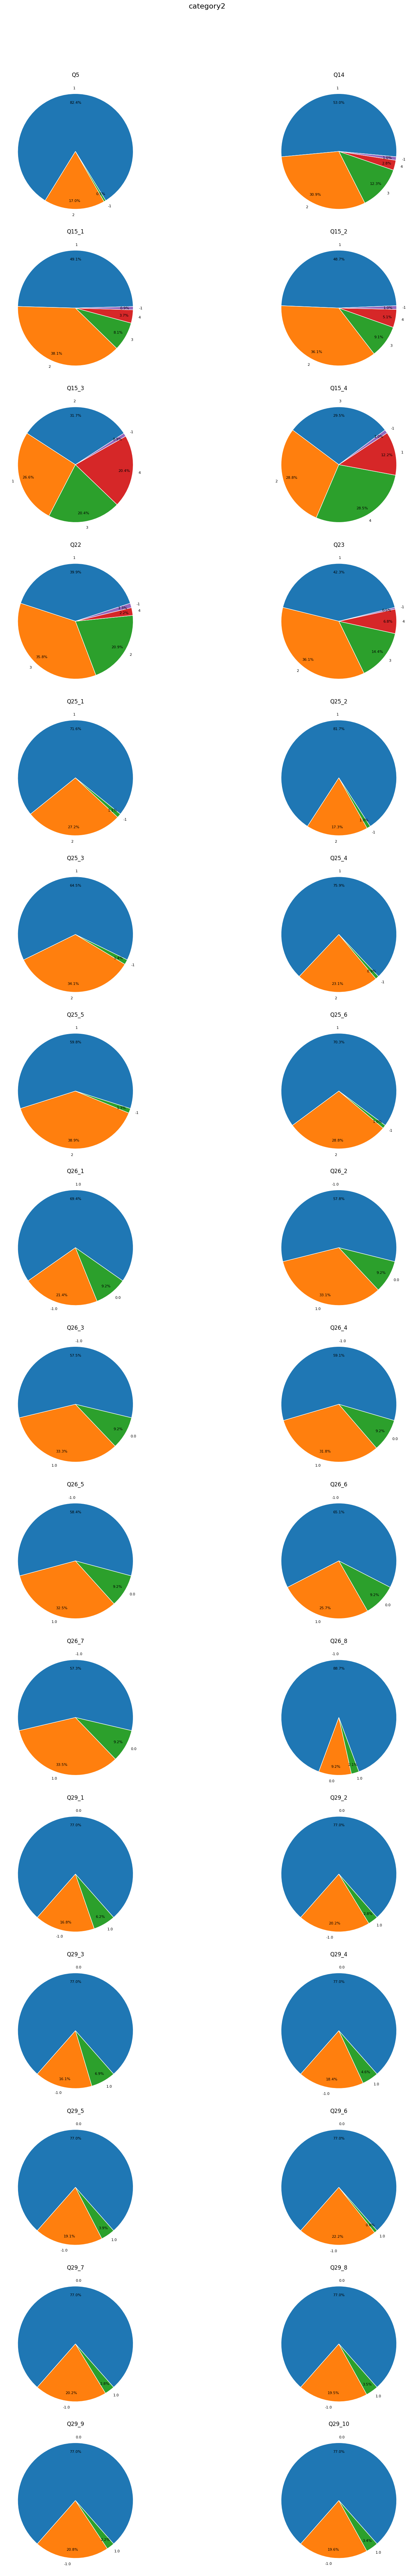

In [6]:
import matplotlib.pyplot as plt
from math import ceil


def plot_pie_charts(data, columns, file_prefix):
    num_plots = len(columns)
    rows = ceil(num_plots / 2)
    fig_size = (20, rows * 5)

    plt.figure(figsize=fig_size)
    for i, col in enumerate(columns):
        values = data[col].value_counts()
        largest_segment_value = values.max()
        largest_segment_index = values.idxmax()

        total = values.sum()
        angles = (values.cumsum() - values / 2) / total * 360
        startangle = 90 - angles[largest_segment_index]

        plt.subplot(rows, 2, i + 1)
        data[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            startangle=startangle,
            textprops={'fontsize': 8},
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
            pctdistance=0.85
        )
        plt.title(col, fontsize=12)
        plt.ylabel('')
        plt.gca().set_aspect('equal')

    plt.suptitle(file_prefix, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # plt.savefig(f'{file_prefix}.png')
    plt.show()


cat_1 = data[['Q2_1', 'Q2_2', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
              'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10',
              'Q18', 'Q19', 'Q20', 'Q21', 'Q24']]

plot_pie_charts(cat_1, cat_1.columns, 'category1')
plot_pie_charts(cat_2, cat_2.columns, 'category2')

## Remove all sorts of encoding

In [7]:
# Mapping for Q1
mapping_q1 = {'Q1': {1: 'Yes', 2: 'No'}}

# Mapping for Q2_1 to Q2_10
mapping_q2 = {i: {1: 'Very important', 2: 'Somewhat important', 3: 'Not so important',
                  4: 'Not at all important'} for i in [f'Q2_{j}' for j in range(1, 11)]}

# Mapping for Q3_1 to Q3_6
mapping_q3 = {i: {1: 'Strongly agree', 2: 'Somewhat agree', 3: 'Somewhat disagree',
                  4: 'Strongly disagree'} for i in [f'Q3_{j}' for j in range(1, 7)]}

# Mapping for Q4_1 to Q4_6
mapping_q4 = {i: {1: 'A significant impact', 2: 'Somewhat of an impact',
                  3: 'Just a slight impact', 4: 'No impact at all'} for i in [f'Q4_{j}' for j in range(1, 7)]}

# Mapping for Q6
mapping_q6 = {'Q6': {1: 'A lot', 2: 'Some', 3: 'Only a few', 4: 'None'}}

# Mapping for Q8_1 to Q8_9
mapping_q8 = {i: {1: 'A lot', 2: 'Some', 3: 'Not much', 4: 'Not at all'}
              for i in [f'Q8_{j}' for j in range(1, 10)]}

# Mapping for Q9_1 to Q9_4
mapping_q9 = {i: {1: 'Very good way', 2: 'Fairly good way', 3: 'Fairly bad way',
                  4: 'Very bad way'} for i in [f'Q9_{j}' for j in range(1, 5)]}

# Mapping for Q10_1 to Q10_4
mapping_q10 = {i: {1: 'Yes', 2: 'No'}
               for i in [f'Q10_{j}' for j in range(1, 5)]}

# Mapping for Q11_1 to Q11_6
mapping_q11 = {i: {1: 'Yes', 2: 'No'}
               for i in [f'Q11_{j}' for j in range(1, 7)]}

# Mapping for Q14
mapping_q14 = {'Q14': {1: 'Very easy', 2: 'Somewhat easy',
                       3: 'Somewhat difficult', 4: 'Very difficult'}}

# Mapping for Q15_1 to Q15_4
mapping_q15 = {i: {1: 'Very confident', 2: 'Somewhat confident', 3: 'Not very confident',
                   4: 'Not at all confident'} for i in [f'Q15_{j}' for j in range(1, 5)]}

# Mapping for Q16_1 to Q16_10
mapping_q16 = {i: {1: 'Yes', 2: 'No'}
               for i in [f'Q16_{j}' for j in range(1, 11)]}

# Mapping for Q18
mapping_q18 = {'Q18': {1: 'Yes', 2: 'No'}}

# Mapping for Q19
mapping_q19 = {'Q19': {1: 'Yes', 2: 'No', 3: 'Unsure/Undecided'}}

# Mapping for Q21
mapping_q21 = {'Q21': {1: 'Yes', 2: 'No', 3: -1}}  # no value for 3

# Mapping for Q23
mapping_q23 = {'Q23': {1: 'Very closely', 2: 'Somewhat closely',
                       3: 'Not very closely', 4: 'Not closely at all'}}

# Mapping for Q24
mapping_q24 = {'Q24': {1: 'Always', 2: 'Sometimes', 3: 'Rarely', 4: 'Never'}}

# Mapping for Q25_1 to Q25_6
mapping_q25 = {i: {1: 'Yes', 2: 'No'}
               for i in [f'Q25_{j}' for j in range(1, 7)]}

# Mapping for Q26_1 to Q26_8
mapping_q26 = {i: {1: 'Agree', 2: 'Disagree'}
               for i in [f'Q26_{j}' for j in range(1, 9)]}

# Mapping for Q29_1 to Q29_10
mapping_q29 = {i: {1: 'Agree', 2: 'Disagree'}
               for i in [f'Q29_{j}' for j in range(1, 11)]}

# Apply mappings
data = data.replace(mapping_q1).replace(mapping_q2).replace(mapping_q3)
data = data.replace(mapping_q4).replace(mapping_q6).replace(mapping_q8)
data = data.replace(mapping_q9).replace(mapping_q10).replace(mapping_q11)
data = data.replace(mapping_q14).replace(mapping_q15).replace(mapping_q16)
data = data.replace(mapping_q18).replace(mapping_q19).replace(mapping_q21)
data = data.replace(mapping_q23).replace(mapping_q24).replace(mapping_q25)
data = data.replace(mapping_q26).replace(mapping_q29)

data.to_csv('no_encoding_data.csv')
data.head()

,weight,age,Education,race,gender,income_cat,voter_category,Q1,Q2_1,Q2_2,...,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Age_grp
RespId,,,,,,,,,,,,,,,,,,,,,
470001,0.7516,73,College,White,Female,$75-125k,always,Yes,Very important,Very important,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Adults
470002,1.0267,90,College,White,Female,$125k or more,always,Yes,Very important,Somewhat important,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Adults
470003,1.0844,53,College,White,Male,$125k or more,sporadic,Yes,Very important,Very important,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-aged Adults
470007,0.6817,58,College,Black,Female,$40-75k,sporadic,Yes,Very important,Very important,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle-aged Adults
480008,0.9910,81,High school or less,White,Male,$40-75k,always,Yes,Very important,Very important,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Senior Adults


## Category-1 vs voter turnout

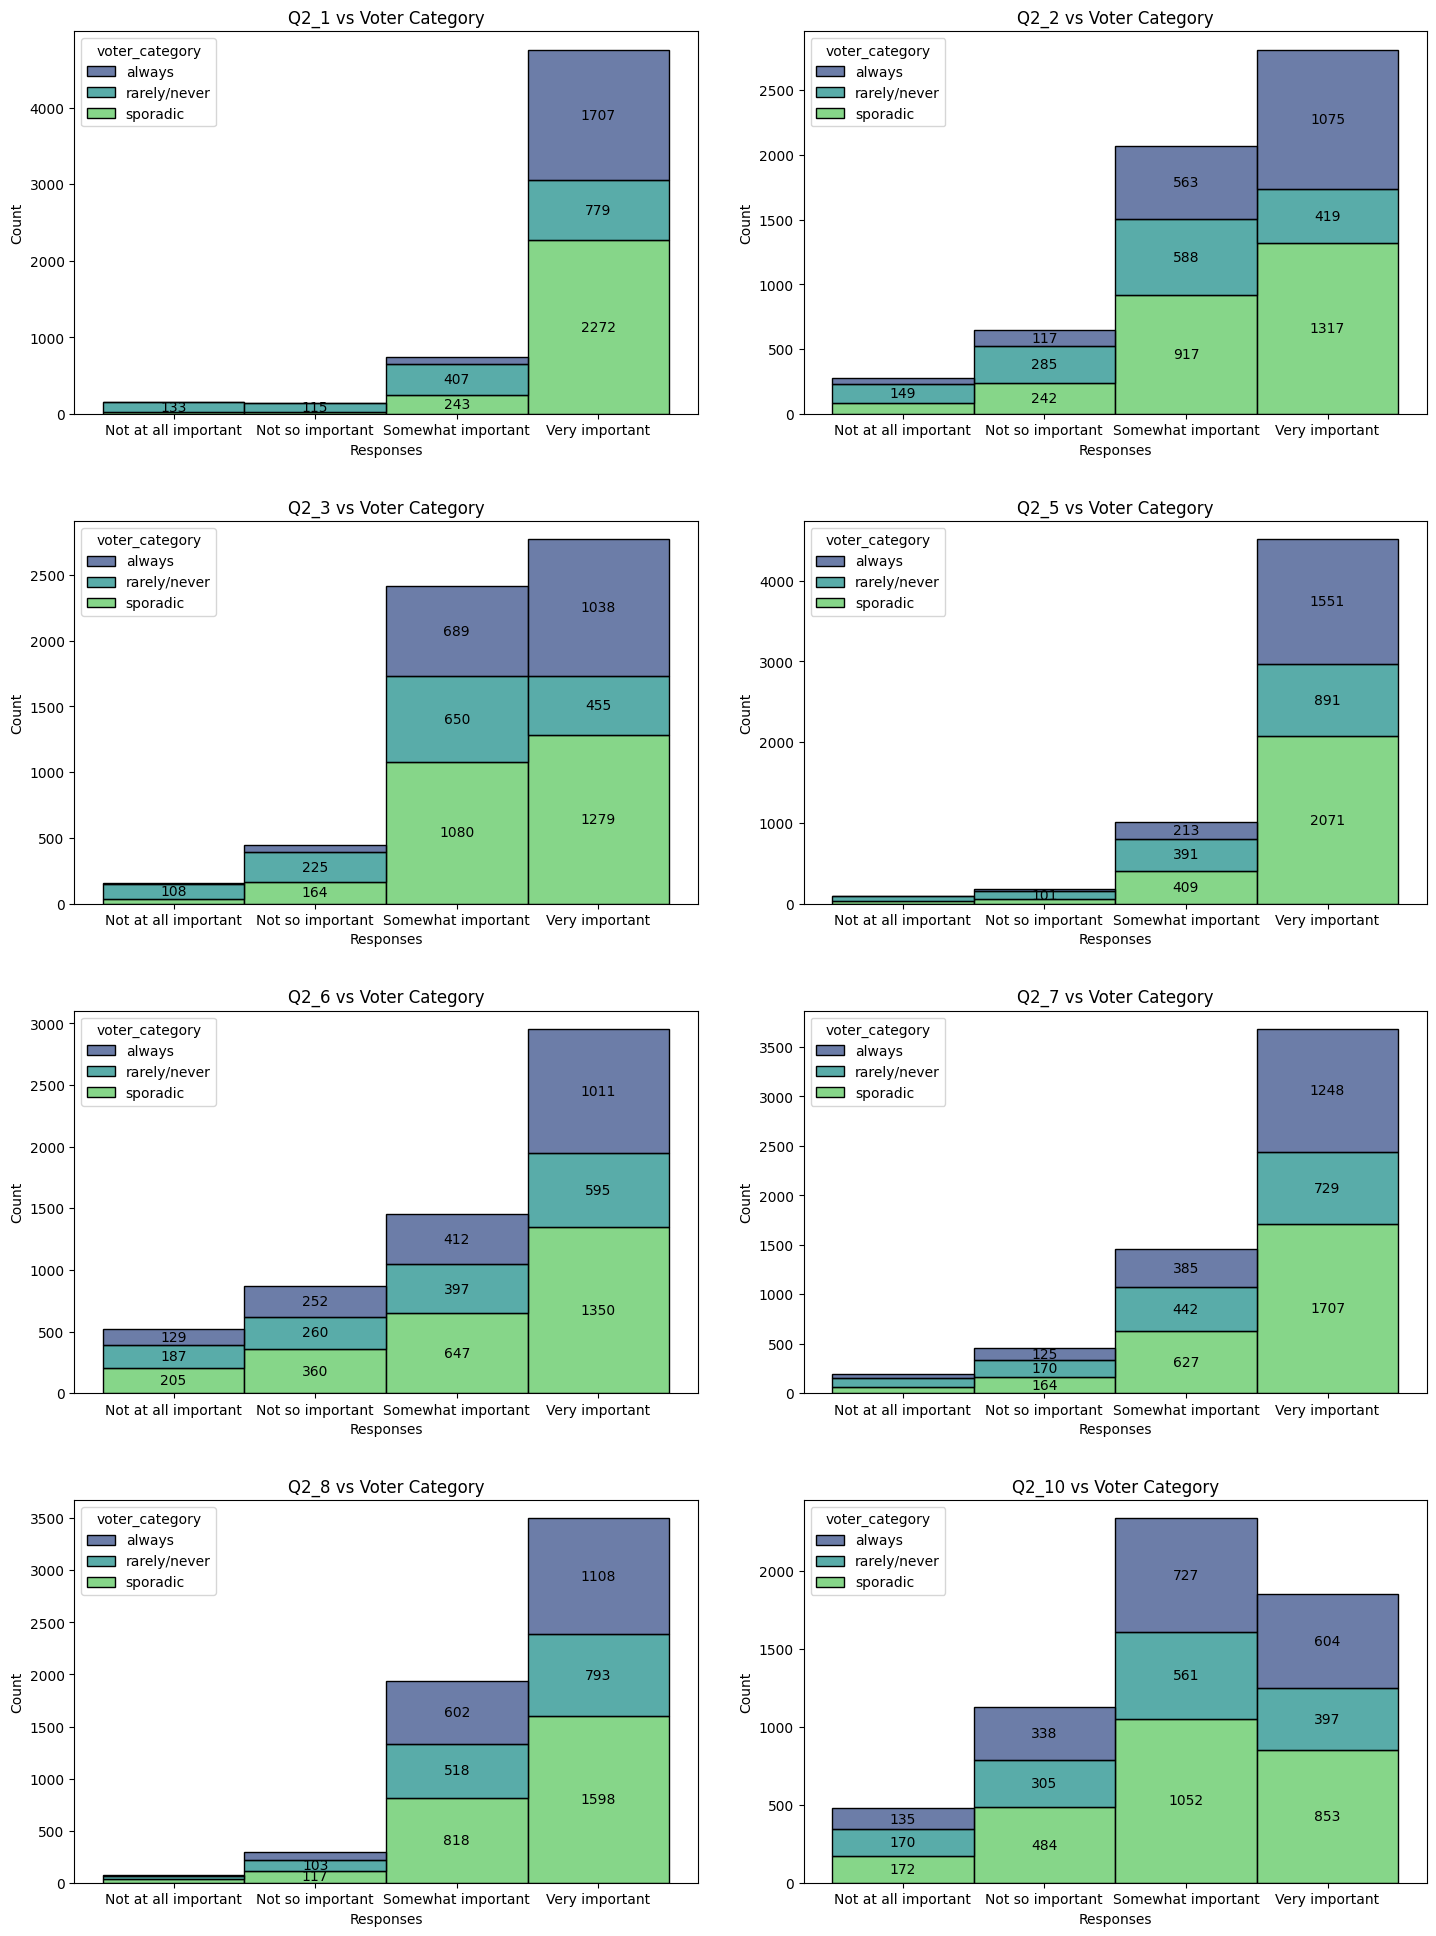

In [8]:
data = pd.read_csv('no_encoding_data.csv')

q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_10']

# plot histogram for Q2_1 to Q2_10 columns vs voter_category
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, col in enumerate(q2_columns):
    temp = data[data[col] != '-1'].sort_values(by=['voter_category', col])
    
    pivot_table = pd.pivot_table(temp, index='voter_category', 
                             values=col, fill_value=0,
                             aggfunc=lambda x: x.value_counts().to_dict())
    # Convert the pivot table to a DataFrame
    pivot_df = pd.DataFrame(pivot_table[col].tolist(), index=pivot_table.index)

    sns_hist = sns.histplot(data=temp, x=col, hue='voter_category', multiple='stack',
                            ax=axes[i//2, i % 2], palette='viridis')
    axes[i//2, i % 2].set_title(f'{col} vs Voter Category')
    axes[i//2, i % 2].set_xlabel('Responses')
    axes[i//2, i % 2].set_ylabel('Count')
    # annotate each section with data values
    for p in sns_hist.patches:
        height = p.get_height()
        if height > 100:
            axes[i//2, i % 2].annotate(f'{int(height)}',
                                       (p.get_x() + p.get_width() /
                                       2., height/2+p.get_y()),
                                       va='center', ha='center')
plt.tight_layout(pad=3.0)
# plt.savefig('./Topic charts/cat-1.png', dpi=300, bbox_inches='tight')
plt.show()

## Heatmap for category-1

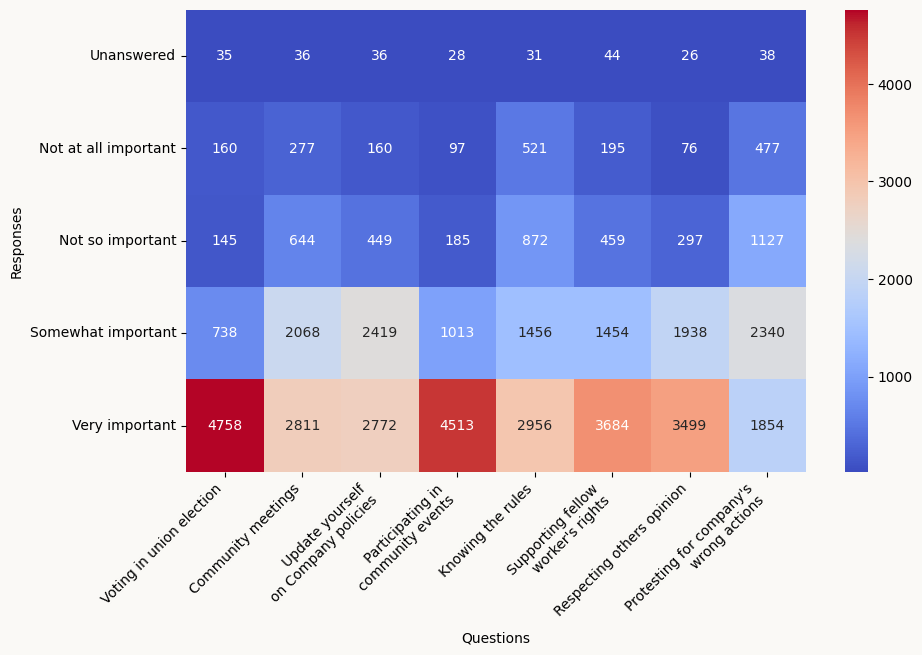

In [9]:
data = pd.read_csv('no_encoding_data.csv')

# plot heatmap for Q2_1 to Q2_10 columns
q2_columns = ['Q2_1', 'Q2_2', 'Q2_3', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_10']


# Replace -1 with a meaningful label in the data
data[q2_columns] = data[q2_columns].replace('-1', 'Unanswered')

pivot_table = data[q2_columns].apply(pd.Series.value_counts).fillna(0)

pivot_table = pivot_table.reindex(['Unanswered', 'Not at all important', 'Not so important',
                                   'Somewhat important', 'Very important'])

temp = data[data[q2_columns] != -1]
plt.figure(figsize=(10, 6))
sns_heatmap = sns.heatmap(pivot_table, annot=True, fmt='g', cmap='coolwarm')
# Set the background color
plt.gcf().set_facecolor('#faf9f6')  # Set the figure background color
sns_heatmap.set_facecolor('#faf9f6')  # Set the axes background color

plt.xlabel('Questions')
plt.ylabel('Responses')
# Set the x-axis labels
heatmap = sns_heatmap.set_xticklabels(['Voting in union election', 'Community meetings', 'Update yourself\non Company policies',
                                       'Participating in\ncommunity events', 'Knowing the rules',
                                       "Supporting fellow\nworker's rights", 'Respecting others opinion',
                                       "Protesting for company's\nwrong actions"],
                                      rotation=45, ha='right')

## Topic-1

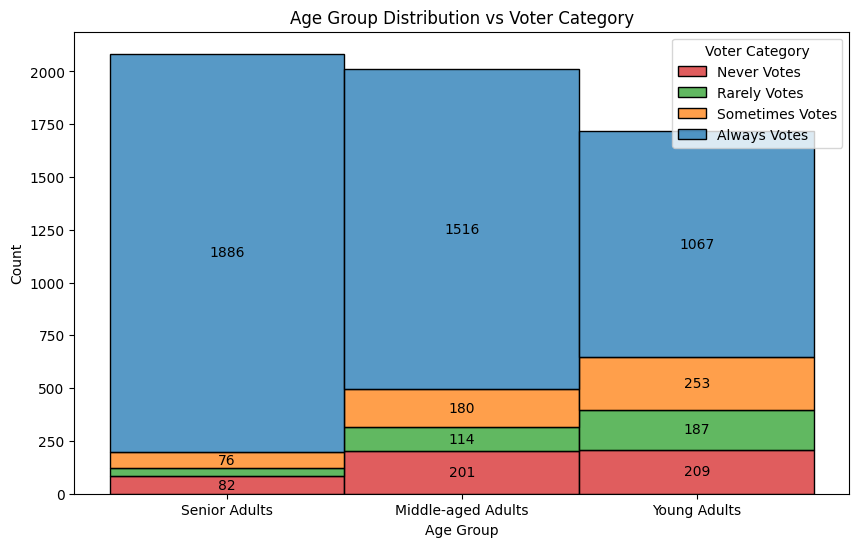

In [10]:
# Read the data
data = pd.read_csv('no_encoding_data.csv', index_col='RespId')

# Filter the data
temp = data[data['Q24'] != '-1']

# Create the plot
plt.figure(figsize=(10, 6))
sns_hist = sns.histplot(data=temp, x='Age_grp', hue='Q24', multiple='stack')

# Add legend
plt.legend(title='Voter Category', 
           labels=['Never Votes', 'Rarely Votes', 'Sometimes Votes', 'Always Votes'])

# Add titles and labels
plt.title('Age Group Distribution vs Voter Category')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Annotate each section with data values
for p in sns_hist.patches:
    height = p.get_height()
    if height > 50:
        plt.annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height / 2 + p.get_y()),
                     va='center', ha='center')

# Show the plot
plt.show()

## Topic-3

In [11]:
data = pd.read_csv('no_encoding_data.csv')

# Take columns from Q4_1 to Q4_6
Q4_columns = ['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4', 'Q4_5', 'Q4_6']
col_names = ['Company executives', 'Department heads', 'Immediate supervisors',
             'Internal communications', 'Large stakeholders', 'Company policies and regulations']

# create a value_counts dataframe for each column
value_counts = [data[col].value_counts() for col in Q4_columns]

# create a dataframe from the value_counts
df = pd.DataFrame(value_counts).T
df.columns = col_names
df[df.index != '-1']

,Company executives,Department heads,Immediate supervisors,Internal communications,Large stakeholders,Company policies and regulations
A significant impact,2596,2345,1877,1090,1234,1971
Somewhat of an impact,2023,2314,2352,2048,2201,2106
Just a slight impact,834,810,1155,1593,1372,1212
No impact at all,344,328,419,1067,985,514


## Topic-4

In [12]:
data = pd.read_csv('no_encoding_data.csv')
columns = ['Q10_4', 'Q11_1', 'Q11_5', 'Q11_6']

# value count together
temp = data[data[columns] != '-1'][columns].apply(pd.Series.value_counts)
temp.columns = ['Evicted from company-provided housing', ' Lost your job',
                'Worried about paying rent or mortgage, for groceries, or health care expenses', 'Quit your job']
temp

,Evicted from company-provided housing,Lost your job,"Worried about paying rent or mortgage, for groceries, or health care expenses",Quit your job
No,5782,5048,4528,5702
Yes,36,767,1292,112


In [13]:
data = pd.read_csv('no_encoding_data.csv')
columns = ['Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5',
           'Q16_6', 'Q16_7', 'Q16_8', 'Q16_9', 'Q16_10']

temp = data[data['Q20'].isin([2, 4, 6])]
temp = temp[temp[columns] != '-1'][columns].apply(pd.Series.value_counts)

temp.columns = ['Incorrect ID', "Couldn't Find Poll", 'Missed Deadline',
                'Inaccessible Location', 'No Assistance', 'Provisional Participation',
                'Work Conflict', 'Long Wait Time', 'Name Not Listed', 'Late Absentee Confirmation']
temp

,Incorrect ID,Couldn't Find Poll,Missed Deadline,Inaccessible Location,No Assistance,Provisional Participation,Work Conflict,Long Wait Time,Name Not Listed,Late Absentee Confirmation
No,304,297,285,295,310,309,294,287,304,304
Yes,9,17,29,20,5,5,20,28,11,10


## Topic-5

In [14]:
# Selecting the relevant columns (Q15_1 to Q15_4)
q15_columns = ['Q15_1', 'Q15_2', 'Q15_3', 'Q15_4']

# Creating a pivot table to count the occurrences of each option in each question
pivot_table = data[q15_columns].apply(pd.Series.value_counts).fillna(0)

print(pivot_table.iloc[1:, :])

                      Q15_1  Q15_2  Q15_3  Q15_4
Not at all confident    216    296   1189   1662
Not very confident      473    532   1191   1724
Somewhat confident     2225   2106   1851   1682
Very confident         2868   2843   1550    711


![topic-5 chart](../Topic%20charts/topic-5_1.png)

## Topic-6

In [15]:
# Create a pivot table with 'Q18' as the index and 'voter_category' as columns
pivot_table = data.pivot_table(index='Q18', columns='voter_category',
                               aggfunc='size', fill_value=0)

# Print the pivoted table
pivot_table

voter_category,always,rarely/never,sporadic
Q18,,,
-1,5,9,6
No,7,463,16
Yes,1799,979,2552


In [16]:
data = pd.read_csv('no_encoding_data.csv')

# Create a pivot table with 'Q21' as the index and 'Q24' as columns
pivot_table = data.pivot_table(index='Q21', columns='Q24',
                               aggfunc='size', fill_value=0)

# Print the pivoted table
pivot_table

Q24,-1,Always,Never,Rarely,Sometimes
Q21,,,,,
-1,15,584,298,109,146
No,7,2324,101,136,209
Yes,3,1561,110,96,137
